Following notebook demonstrates a quick way to predict sentiment of a writtent text with no prior label data training.

Hope you like it !

In [1]:
import os
import pandas as pd
import math as m
from time import gmtime, strftime
import numpy as np
import pyodbc
import sqlalchemy as sa 
import psycopg2
import re

In [3]:
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import movie_reviews
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk import tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

Initialize Sentiment Analyzer : An out of the box functaionality from NLTK library

In [4]:
sid = SentimentIntensityAnalyzer()

Let's do a quick check with analysis of one tweet and see how good this out of the box functionality works

In [5]:
AK_Tweet="Hon'ble LG agreed DISCOMS shud pay compensation 4 unscheduled power cuts 2 make them accountable. Fairplay n equity 2 consumers 2 be ensured"
print AK_Tweet

Hon'ble LG agreed DISCOMS shud pay compensation 4 unscheduled power cuts 2 make them accountable. Fairplay n equity 2 consumers 2 be ensured


Let's check polarity score for the above tweet

In [6]:
print sid.polarity_scores(AK_Tweet)

{'neg': 0.174, 'neu': 0.725, 'pos': 0.101, 'compound': -0.128}


The above polaity score suggest most of the words used are neutral in nature however overall compound score is "negative"

Also, notice that negative score is higher than positive score suggeting me that its a negative tweet.

Which is true. Isn't it !

Let's try removing stopwords & numbers as neither conveys sentiments and see if it improves the scores.

In [7]:
stop_words = set(stopwords.words('english'))
words = AK_Tweet.split()
AK_Tweet_WithoutStopWordsnNumbers = ''
for r in words:
    if not r in stop_words:
        AK_Tweet_WithoutStopWordsnNumbers = AK_Tweet_WithoutStopWordsnNumbers + ' ' +  r
AK_Tweet_WithoutStopWordsnNumbers = re.sub(r'\d+', '', AK_Tweet_WithoutStopWordsnNumbers)
print AK_Tweet_WithoutStopWordsnNumbers

 Hon'ble LG agreed DISCOMS shud pay compensation  unscheduled power cuts  make accountable. Fairplay n equity  consumers  ensured


In [8]:
print sid.polarity_scores(AK_Tweet_WithoutStopWordsnNumbers)

{'neg': 0.193, 'neu': 0.695, 'pos': 0.112, 'compound': -0.128}


Let's say you have a dataframe with text to be analysed like :

* movie reviews
* call notes
* tweets 
* facebook posts etc

and all the posts are unlabeled i.e no prior knowledge of sentiment available. 

Following code can do the trick and give a sentiment inidicator or classify text as positive of negative !!! 


In [9]:
from urllib2 import Request, urlopen
import json
data = pd.read_json("//home//rahul//Downloads//Amazon_Instant_Video_5.json", lines=True)
print data.shape
data.head(2)

(37126, 9)


,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,B000H00VBQ,"[0, 0]",2,I had big expectations because I love English ...,"05 3, 2014",A11N155CW1UV02,AdrianaM,A little bit boring for me,1399075200
1,B000H00VBQ,"[0, 0]",5,I highly recommend this series. It is a must f...,"09 3, 2012",A3BC8O2KCL29V2,Carol T,Excellent Grown Up TV,1346630400


Classify Amazon Video reviews & Examine Positive reviews only

In [10]:
Positive_Reviews = []
for index, row in data.iterrows():
    reviewText = row['reviewText']
    words = reviewText.split()
    reviewText = ''
    for r in words:
        if not r in stop_words:
            reviewText = reviewText + ' ' +  r
    ss = sid.polarity_scores(reviewText)
    if((ss['pos']>0)&(ss['pos']>ss['neg'])):
        Positive_Reviews.append(reviewText)

In [11]:
print '\nTop 10 Positive Reviews'
for review in Positive_Reviews[1:10]:
        print '\n' + review 


Top 10 Positive Reviews

 I highly recommend series. It must anyone yearning watch "grown up" television. Complex characters plots keep one totally involved. Thank Amazin Prime.

 Mysteries interesting. The tension Robson tall blond good always believable. She often seemed uncomfortable.

 This show always excellent, far british crime mystery showsgoes one best ever made. The stories well done acting top notch interesting twists realistic brutal storylines. This show pulls punches enters twisted minds criminals profiler psychiatrist helps northern english city police force. The show looks like shot Manchester called another name show. One episode disc excellent 'prayer bone" seperate disc. Still crime shows don't get much better one either side ocean. It's great show never less well made episode. Unfortunately like British shows get five shows year , hour half shows , still one could hope least 8 year. The realism depth main character Tony Hill protrayed excellent Robson Green well wo

Now, Negative Reviews

In [12]:
Negative_Reviews = []
for index, row in data.iterrows():
    reviewText = row['reviewText']
    words = reviewText.split()
    reviewText = ''
    for r in words:
        if not r in stop_words:
            reviewText = reviewText + ' ' +  r
    ss = sid.polarity_scores(reviewText)
    if((ss['neg']>0)&(ss['pos']<ss['neg'])):
        Negative_Reviews.append(reviewText)

In [13]:
print '\nTop 10 Positive Reviews'
for review in Negative_Reviews[1:10]:
        print '\n' + review 


Top 10 Positive Reviews

 I discovered series quite accident. Having watched appreciated Masterpiece Contemporary: Place Execution, I keen read novel (which inspired TV adaptation) Val McDermid. The novel well-written, nail-biting suspense thriller. Then I discovered Val McDermid wrote novels well, couple inspired TV crime drama Wire Blood.I finished watching Season 1 become fan gritty crime drama follows investigations led DI Carol Jordan (Hermione Norris). She assisted clinical psychologist Dr. Tony Hill (Robson Green), rather eccentric figure delves deeply minds serial killers, studies patterns criminal behavior profiles criminals. His methods may seem strange times, always manages get results. Both Jordan Hill make strange compelling pair, Jordan analyzing case based evidence, Hill working based knowledge deviant behavior makes people commit disturbing crimes.Unlike "cozy" mysteries long-running Midsomer Murders - Set One The Complete Inspector Lynley Mysteries, Wire Blood faint h

### Lets have a quick glance at Word Clouds !

In [14]:
from wordcloud import WordCloud

In [15]:
# Generate a word cloud image : Positive Reviews
Positive_Reviews_TxT = ''.join(Positive_Reviews)
wordcloud = WordCloud().generate(Positive_Reviews_TxT)

# Generate a word cloud image : Negative Reviews
Negative_Reviews_TxT = ''.join(Negative_Reviews)
wordcloud = WordCloud().generate(Negative_Reviews_TxT)

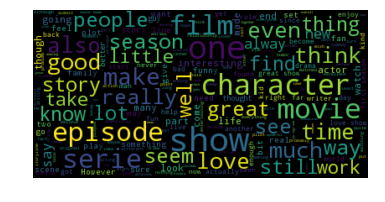

In [16]:
# Positive Reviews
import matplotlib.pyplot as plt
wordcloud = WordCloud(max_font_size=40).generate(Positive_Reviews_TxT)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

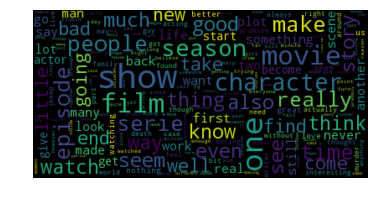

In [17]:
# Negative Reviews
import matplotlib.pyplot as plt
wordcloud = WordCloud(max_font_size=40).generate(Negative_Reviews_TxT)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Basis context/domain knowldge you may like to 

* snooze some words 
* may be look at bigrams/trigrams to infer sentiments better. 
* Further, see if there are any emoji's in the text , which is a great way to express sentiments these days ininformal channels.

Let me know your thoughts. 

Cheers !!!